<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/03_Neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with Tensorflow**

| Hyperparameter | Binary Classification | Multiclass Classification |
| :------------- | :-------------------- | :------------------------ |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum=unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, genrally 10 to 100 | Same as binary classification |
| Output layer shape | 1(one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually `ReLU`(rectified linear unit) | Same as binary classification |
| Ouput activation | `Sigmoid` | `Softmax` |
| Loss function | `Cross entropy`(`tf.keras.losses.BinaryCrossentropy` in Tensorflow) |`Cross entropy`(`tf.keras.losses.CategoricalCrossentropy` in Tensorflow) |
| Optimizer | `SGD`(stochastic gradient descent), `Adam` | Same as binary classification |

# **Introduction to Neural networks classification with Tensorflow**

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classfication
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [27]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [28]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [29]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

 Our data is a little hard to understand right now... let's visualize it

In [30]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


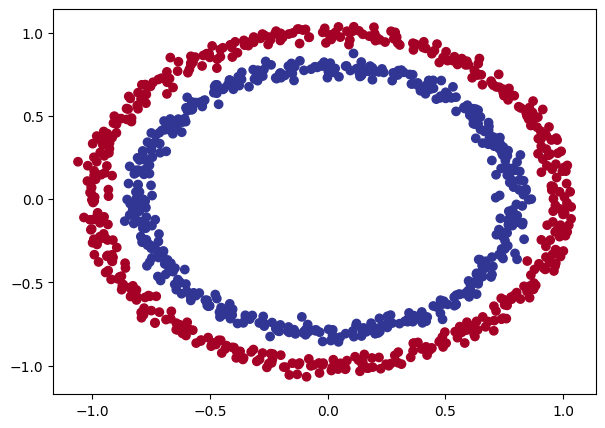

In [31]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**[playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.77858&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)**

## Input and output shapes

In [32]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [33]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [34]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate the model

In [35]:
# Building a neural network model for classification
import tensorflow as tf
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model using Sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4620 - loss: 4.5187
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4540 - loss: 3.8290 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5088 - loss: 0.7634
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5075 - loss: 0.7096 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.6977


## Improving model

1.  `Create a model` - we might to add more layers or increase the number of hidden units within a layer.
2. `Compiling a model` - here we might choose a different optimization function such as **Adam** instead of **SGD()**.
3. `Fitting a model` - we can leave our model for a longer training period time.

In [36]:
# Let's try and imporve our model by training fro longer,
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step thimngs up a notch and add an extra layer.

> ## `Build model_1`

In [37]:
tf.random.set_seed(42)

# 1. create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=100, verbose=0)

In [38]:
# 4. Evaluate the model
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 0.6932


[0.6932069659233093, 0.5]

Oops! Accuracy decreased

> ## ` Build model_2`

In [39]:
# Build model_2

tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(10, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # changing optimizer to Adam
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [40]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0026      


[0.0024552340619266033, 1.0]

To visualize our model's prediction let's create a function. `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values
* Make predictions accross meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0])>1:
    print("This is a multicalss classification....")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("This is a Binary classification....")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


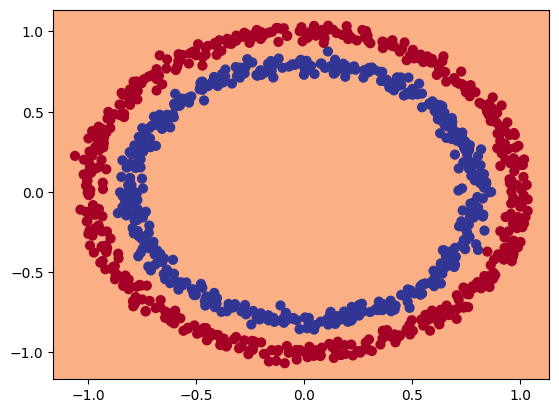

In [43]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)